In [46]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn import tree
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
pd.set_option('display.max_columns', None) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar

In [48]:
df_svc = pd.read_csv('./data/heart_disease_data_clean.csv', sep = ',', encoding= 'utf-8') #Lectura del CSV con los datos transformados

In [49]:
df_svc.head()

,Index,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,0,26.50,False,False,False,0,0,False,Male,64-60,White,No,True,Very good,8.0,False,False,False,False
1,1,28.75,False,False,False,0,2,False,Male,59-55,White,No,True,Very good,7.0,False,False,False,False
2,3,28.06,False,False,False,1,1,False,Female,69-65,White,Yes,True,Good,8.0,False,False,False,False
3,4,29.29,True,False,False,0,1,False,Female,74-70,White,No,True,Very good,7.0,True,False,False,False
4,5,25.15,True,True,False,14,0,False,Female,59-55,Other,No,True,Fair,6.0,False,False,False,False


In [50]:
df_svc.dtypes

Index                 int64
BMI                 float64
Smoking                bool
AlcoholDrinking        bool
Stroke                 bool
PhysicalHealth        int64
MentalHealth          int64
DiffWalking            bool
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity       bool
GenHealth            object
SleepTime           float64
Asthma                 bool
KidneyDisease          bool
SkinCancer             bool
HeartDisease           bool
dtype: object

In [51]:
 #Se quita la columna de Index para que no sea tenida en cuenta en los modelos
df_svc.head()

,Index,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,0,26.50,False,False,False,0,0,False,Male,64-60,White,No,True,Very good,8.0,False,False,False,False
1,1,28.75,False,False,False,0,2,False,Male,59-55,White,No,True,Very good,7.0,False,False,False,False
2,3,28.06,False,False,False,1,1,False,Female,69-65,White,Yes,True,Good,8.0,False,False,False,False
3,4,29.29,True,False,False,0,1,False,Female,74-70,White,No,True,Very good,7.0,True,False,False,False
4,5,25.15,True,True,False,14,0,False,Female,59-55,Other,No,True,Fair,6.0,False,False,False,False


In [52]:

def assigning_number_sex(row): #Función para asignar valores de 0 o 1 para representar 'Female' or 'Male' utilizado en Arboles de Decisión
    if row == "Male":
        return 1
    else:
        return 0

def assigning_number_age_category(row): #Asigna un número a las categorias de edades
    if row == "54-50":
        return 0
    elif row == "59-55":
        return 1
    elif row == "64-60":
        return 2
    elif row == "69-65":
        return 3
    elif row == "74-70":
        return 4
    elif row == "79-75":
        return 5
    else:
        return 6

def assigning_number_race(row): #Asigna un número a las categorias de raza
    if row == "White":
        return 0
    elif row == "Black":
        return 1
    elif row == "Hispanic":
        return 2
    elif row == "Asian":
        return 3
    elif row == "Other":
        return 4

def assigning_number_gen_health(row): #Asigna un número a las categorias de salud general
    if row == "Poor":
        return 0
    elif row == "Fair":
        return 1
    elif row == "Good":
        return 2
    elif row == "Very good":
        return 3
    elif row == "Excellent":
        return 4

def assigning_number_diabetic(row): #Asigna un número a las categorias de diabetes
    if row == "No":
        return 0
    elif row == "No, borderline diabetes":
        return 1
    elif row == "Yes":
        return 2
    elif row == "Yes (during pregnancy)":
        return 3

In [53]:
df_desition_tree = df_svc #Dataframe a partir de los datos originales
df_desition_tree['Sex'] = df_desition_tree['Sex'].apply(assigning_number_sex) #Aplica la función para convertir las categorias a números
df_desition_tree['AgeCategory'] = df_desition_tree['AgeCategory'].apply(assigning_number_age_category) #Aplica la función para convertir las categorias a números
df_desition_tree['Race'] = df_desition_tree['Race'].apply(assigning_number_race) #Aplica la función para convertir las categorias a números
df_desition_tree['GenHealth'] = df_desition_tree['GenHealth'].apply(assigning_number_gen_health) #Aplica la función para convertir las categorias a números
df_desition_tree['Diabetic'] = df_desition_tree['Diabetic'].apply(assigning_number_diabetic) #Aplica la función para convertir las categorias a números

In [54]:
df_svc.head()

,Index,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,0,26.50,False,False,False,0,0,False,1,2,0,0,True,3,8.0,False,False,False,False
1,1,28.75,False,False,False,0,2,False,1,1,0,0,True,3,7.0,False,False,False,False
2,3,28.06,False,False,False,1,1,False,0,3,0,2,True,2,8.0,False,False,False,False
3,4,29.29,True,False,False,0,1,False,0,4,0,0,True,3,7.0,True,False,False,False
4,5,25.15,True,True,False,14,0,False,0,1,4,0,True,1,6.0,False,False,False,False


In [55]:
#Lista de variables independientes
independent_variables = ["BMI", "Smoking", "AlcoholDrinking", "Stroke", "PhysicalHealth", "MentalHealth", "DiffWalking", "Sex", "AgeCategory", "Race", "Diabetic", 
"PhysicalActivity", "GenHealth", "SleepTime", "Asthma", "KidneyDisease", "SkinCancer"]

#Lista de variables dependientes
dependent_variables = ["HeartDisease"]

Division de datos

In [56]:
#Train test split para KNN y Arboles de decisión
X_train, X_test, Y_train, Y_test = train_test_split(df_desition_tree[independent_variables], df_desition_tree[dependent_variables], test_size = 0.2, random_state = 0)

# KNN Model

In [57]:
#KNN Model
knn_model = KNeighborsClassifier(n_neighbors = 5)

In [58]:
#Ajuste a los datos de entrenamiento
knn_model.fit(X_train, Y_train)

/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [59]:
#Predicciones para KNN
preds_train = knn_model.predict(X_train)
preds_test = knn_model.predict(X_test)

In [60]:
#Precisión del entrenamiento vs datos de prueba
print('Accuracy (train):', accuracy_score(Y_train, preds_train))
print('Accuracy (test):', accuracy_score(Y_test, preds_test))

Accuracy (train): 0.8260936489856232
Accuracy (test): 0.7845092968846201


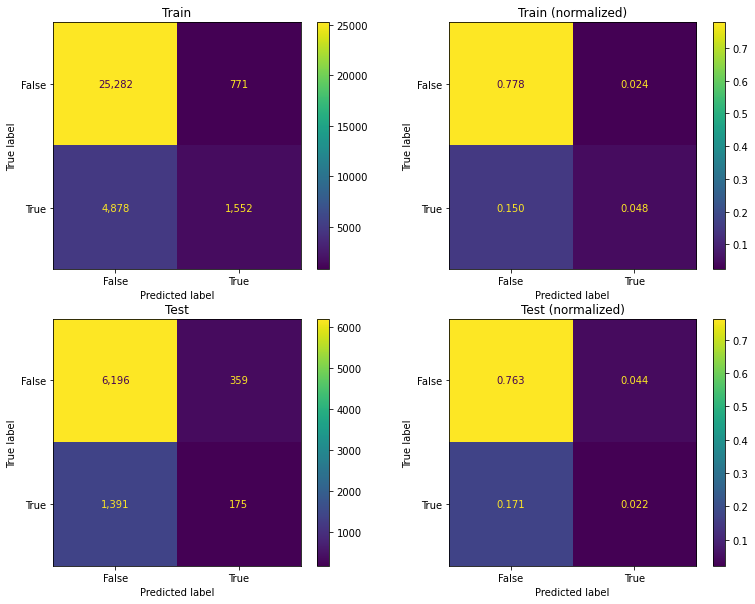

In [61]:
#Impresión de  los heatmaps de las predicciones realizadas
cm_train = confusion_matrix(Y_train, preds_train, labels = knn_model.classes_)
cm_train_norm = confusion_matrix(Y_train, preds_train, labels = knn_model.classes_, normalize = 'all')
cm_test = confusion_matrix(Y_test, preds_test, labels = knn_model.classes_)
cm_test_norm = confusion_matrix(Y_test, preds_test, labels = knn_model.classes_, normalize = 'all')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (13, 10))
ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = knn_model.classes_).plot(ax = ax1, values_format = ',.0f')
ConfusionMatrixDisplay(confusion_matrix = cm_train_norm, display_labels = knn_model.classes_).plot(ax = ax2, values_format = '.3f')
ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = knn_model.classes_).plot(ax = ax3, values_format = ',.0f')
ConfusionMatrixDisplay(confusion_matrix = cm_test_norm, display_labels = knn_model.classes_).plot(ax = ax4, values_format = '.3f')

ax1.set_title('Train')
ax2.set_title('Train (normalized)')
ax3.set_title('Test')
ax4.set_title('Test (normalized)')
plt.show()

In [62]:
#Indices de puntuación del modelo KNN
pd.DataFrame([
    {
        'Train': accuracy_score(Y_train, preds_train),
        'Test': accuracy_score(Y_test, preds_test)
    },
    {
        'Train': precision_score(Y_train, preds_train),
        'Test': precision_score(Y_test, preds_test)
    },
    {
        'Train': recall_score(Y_train, preds_train),
        'Test': recall_score(Y_test, preds_test)
    },
    {
        'Train': f1_score(Y_train, preds_train),
        'Test': f1_score(Y_test, preds_test)
    }
], index = ['Accuracy', 'Precision', 'Recall', 'F1'])

,Train,Test
Accuracy,0.826094,0.784509
Precision,0.668102,0.327715
Recall,0.241369,0.111750
F1,0.354621,0.166667


Crear árbol de decisión

In [63]:
# La complejidad del árbol es controlada limitando la máxima profundidad que tendrá tras su entrenamiento
tree_model = DecisionTreeClassifier(random_state = 1626)

Entrenar árbol de decisión

In [64]:
tree_model.fit(X_train, Y_train) #Entrenamiento del modelo

DecisionTreeClassifier(random_state=1626)

In [65]:
tree_model.get_depth() #Altura del modelo

48

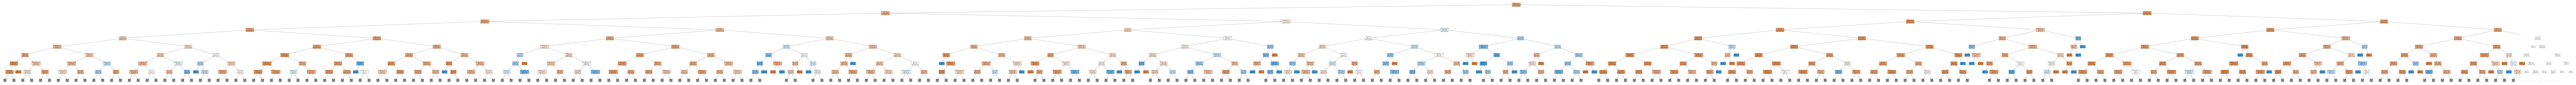

In [66]:
fig = plt.figure(figsize = (600, 20)) #Impresión del arbol generado después del entrenamiento
_ = tree.plot_tree(tree_model, max_depth = 8, feature_names = independent_variables, filled = True, fontsize = 9)
fig.savefig('decistion_tree.png') # También es posible guardar esta figura como una imagen

In [67]:
#Predicciones del modelo de árbol de decisión
preds_train = tree_model.predict(X_train)
preds_test = tree_model.predict(X_test)

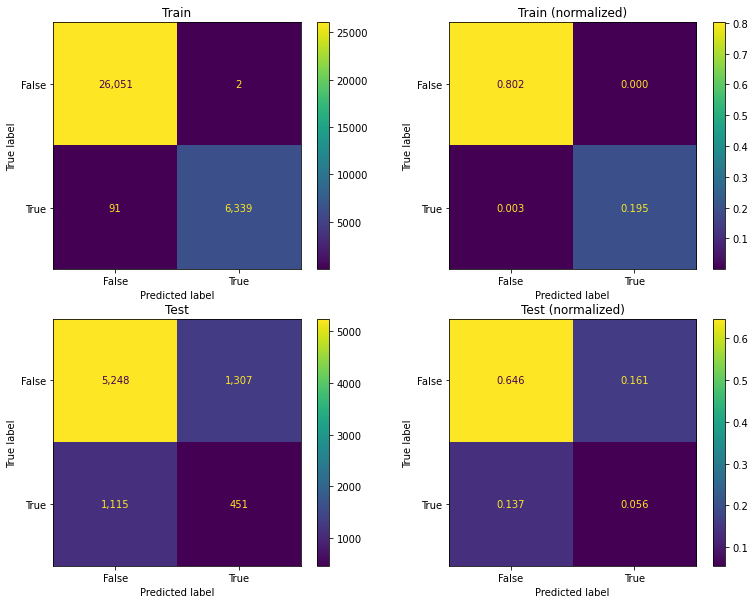

In [68]:
#Impresión de  los heatmaps de las predicciones realizadas
cm_train = confusion_matrix(Y_train, preds_train, labels = tree_model.classes_)
cm_train_norm = confusion_matrix(Y_train, preds_train, labels = tree_model.classes_, normalize = 'all')
cm_test = confusion_matrix(Y_test, preds_test, labels = tree_model.classes_)
cm_test_norm = confusion_matrix(Y_test, preds_test, labels = tree_model.classes_, normalize = 'all')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (13, 10))
ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = tree_model.classes_).plot(ax = ax1, values_format = ',.0f')
ConfusionMatrixDisplay(confusion_matrix = cm_train_norm, display_labels = tree_model.classes_).plot(ax = ax2, values_format = '.3f')
ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = tree_model.classes_).plot(ax = ax3, values_format = ',.0f')
ConfusionMatrixDisplay(confusion_matrix = cm_test_norm, display_labels = tree_model.classes_).plot(ax = ax4, values_format = '.3f')

ax1.set_title('Train')
ax2.set_title('Train (normalized)')
ax3.set_title('Test')
ax4.set_title('Test (normalized)')
plt.show()

In [69]:
#Indices de puntuación del modelo Arbol de decisión
pd.DataFrame([
    {
        'Train': accuracy_score(Y_train, preds_train),
        'Test': accuracy_score(Y_test, preds_test)
    },
    {
        'Train': precision_score(Y_train, preds_train),
        'Test': precision_score(Y_test, preds_test)
    },
    {
        'Train': recall_score(Y_train, preds_train),
        'Test': recall_score(Y_test, preds_test)
    },
    {
        'Train': f1_score(Y_train, preds_train),
        'Test': f1_score(Y_test, preds_test)
    }
], index = ['Accuracy', 'Precision', 'Recall', 'F1'])

,Train,Test
Accuracy,0.997137,0.701761
Precision,0.999685,0.256542
Recall,0.985848,0.287995
F1,0.992718,0.271360


# Naive Bayes

In [70]:
#Import de los datos del Algoritmo de Naive Bayes Gaussian
df_nb = pd.read_csv('./data/heart_disease_data_clean.csv', sep = ',', encoding= 'utf-8')

In [71]:
#Elimina la columna de Index
df_nb = df_nb.drop(labels = 'Index',  axis = 1)
df_nb.shape

(40604, 18)

In [72]:
#Declara la variable objetivo y los inputs que se usaran para las predicciones
target = df_nb['HeartDisease']
inputs = df_nb.drop('HeartDisease', axis = 1)
inputs.shape

(40604, 17)

In [73]:
#Los dummies separan las variables categoricas en columnas para que Naive Bayes entrene el modelo
sex_dummies = pd.get_dummies(df_nb['Sex'])
age_category_dummies = pd.get_dummies(df_nb['AgeCategory'])
race_dummies = pd.get_dummies(df_nb['Race'])
diabetic_dummies = pd.get_dummies(df_nb['Diabetic'])
gen_health_dummies = pd.get_dummies(df_nb['GenHealth'])

In [74]:
#Elimina las columnas categoricas para poder utilizar los dummies
inputs = inputs.drop(['Sex', 'AgeCategory', 'Race', 'Diabetic', 'GenHealth'], axis = 1)
inputs.head(5)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer
0,26.50,False,False,False,0,0,False,True,8.0,False,False,False
1,28.75,False,False,False,0,2,False,True,7.0,False,False,False
2,28.06,False,False,False,1,1,False,True,8.0,False,False,False
3,29.29,True,False,False,0,1,False,True,7.0,True,False,False
4,25.15,True,True,False,14,0,False,True,6.0,False,False,False


In [75]:
#Concatena los dummies al df de inputs
inputs = pd.concat([inputs, sex_dummies], axis = 'columns')
inputs = pd.concat([inputs, age_category_dummies], axis = 'columns')
inputs = pd.concat([inputs, race_dummies], axis = 'columns')
inputs = pd.concat([inputs, diabetic_dummies], axis = 'columns')
inputs = pd.concat([inputs, gen_health_dummies], axis = 'columns')
print(inputs.shape)
inputs.head(10)

(40604, 35)


,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,Female,Male,54-50,59-55,64-60,69-65,74-70,79-75,80 or older,Asian,Black,Hispanic,Other,White,No,"No, borderline diabetes",Yes,Yes (during pregnancy),Excellent,Fair,Good,Poor,Very good
0,26.50,False,False,False,0,0,False,True,8.0,False,False,False,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
1,28.75,False,False,False,0,2,False,True,7.0,False,False,False,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
2,28.06,False,False,False,1,1,False,True,8.0,False,False,False,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
3,29.29,True,False,False,0,1,False,True,7.0,True,False,False,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
4,25.15,True,True,False,14,0,False,True,6.0,False,False,False,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
5,26.29,True,False,False,0,0,False,False,8.0,False,False,False,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
6,27.41,True,False,False,0,0,False,True,7.0,False,False,False,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
7,183.24,True,False,False,0,0,False,False,6.0,False,False,True,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0
8,21.95,True,False,False,3,0,False,True,5.0,False,False,False,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
9,26.63,False,False,False,0,0,False,True,7.0,False,False,False,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0


In [76]:
#Se define otros x and y de train y test por el esquema de datos diferentes
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2, random_state = 0)

In [78]:
#Inicialización del Naive Bayes Gaussian
model = GaussianNB()

In [79]:
#Entrenamiento del modelo
model.fit(x_train, y_train)

GaussianNB()

In [80]:
# Generación de predicciones para entrenamiento y test para el cálculo de errores
preds_train = model.predict(x_train)
preds_test = model.predict(x_test)

In [81]:
# se evalua la precisión de las predicciones
print('Accuracy (train):', accuracy_score(y_train, preds_train))
print('Accuracy (test):', accuracy_score(y_test, preds_test))

Accuracy (train): 0.7262568112551181
Accuracy (test): 0.7336534909493905


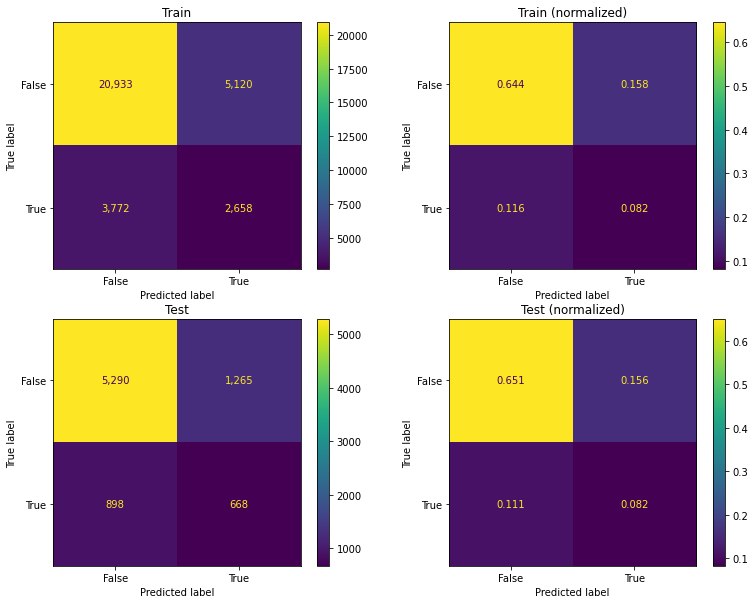

In [82]:
#Impresión de  los heatmaps de las predicciones realizadas

cm_train = confusion_matrix(y_train, preds_train, labels = model.classes_)
cm_train_norm = confusion_matrix(y_train, preds_train, labels = model.classes_, normalize = 'all')
cm_test = confusion_matrix(y_test, preds_test, labels = model.classes_)
cm_test_norm = confusion_matrix(y_test, preds_test, labels = model.classes_, normalize = 'all')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (13, 10))
ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = model.classes_).plot(ax = ax1, values_format = ',.0f')
ConfusionMatrixDisplay(confusion_matrix = cm_train_norm, display_labels = model.classes_).plot(ax = ax2, values_format = '.3f')
ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = model.classes_).plot(ax = ax3, values_format = ',.0f')
ConfusionMatrixDisplay(confusion_matrix = cm_test_norm, display_labels = model.classes_).plot(ax = ax4, values_format = '.3f')

ax1.set_title('Train')
ax2.set_title('Train (normalized)')
ax3.set_title('Test')
ax4.set_title('Test (normalized)')
plt.show()

In [83]:
#Indices de puntuación del modelo KNN
pd.DataFrame([
    {
        'Train': accuracy_score(y_train, preds_train),
        'Test': accuracy_score(y_test, preds_test)
    },
    {
        'Train': precision_score(y_train, preds_train),
        'Test': precision_score(y_test, preds_test)
    },
    {
        'Train': recall_score(y_train, preds_train),
        'Test': recall_score(y_test, preds_test)
    },
    {
        'Train': f1_score(y_train, preds_train),
        'Test': f1_score(y_test, preds_test)
    }
], index = ['Accuracy', 'Precision', 'Recall', 'F1'])

,Train,Test
Accuracy,0.726257,0.733653
Precision,0.341733,0.345577
Recall,0.413375,0.426564
F1,0.374155,0.381823


# CSV Naive Bayes

In [84]:
#Se lee el dataset de test para predecir en los 3 modelos
test_target = pd.read_csv('./data/heart_disease_test_clean.csv', sep = ',', encoding= 'utf-8')

In [85]:
#Se prepara el dataset para predecir en GaussianNB
sex_dummies = pd.get_dummies(test_target['Sex'])
age_category_dummies = pd.get_dummies(test_target['AgeCategory'])
race_dummies = pd.get_dummies(test_target['Race'])
diabetic_dummies = pd.get_dummies(test_target['Diabetic'])
gen_health_dummies = pd.get_dummies(test_target['GenHealth'])

In [86]:
#Se prepara el dataset para predecir en GaussianNB
inputs_test = test_target.drop(['Sex', 'AgeCategory', 'Race', 'Diabetic', 'GenHealth'], axis = 1)
inputs.head(5)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,Female,Male,54-50,59-55,64-60,69-65,74-70,79-75,80 or older,Asian,Black,Hispanic,Other,White,No,"No, borderline diabetes",Yes,Yes (during pregnancy),Excellent,Fair,Good,Poor,Very good
0,26.50,False,False,False,0,0,False,True,8.0,False,False,False,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
1,28.75,False,False,False,0,2,False,True,7.0,False,False,False,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
2,28.06,False,False,False,1,1,False,True,8.0,False,False,False,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
3,29.29,True,False,False,0,1,False,True,7.0,True,False,False,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
4,25.15,True,True,False,14,0,False,True,6.0,False,False,False,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0


In [87]:
#Se prepara el dataset para predecir en GaussianNB
inputs_test = pd.concat([inputs_test, sex_dummies], axis = 'columns')
inputs_test = pd.concat([inputs_test, age_category_dummies], axis = 'columns')
inputs_test = pd.concat([inputs_test, race_dummies], axis = 'columns')
inputs_test = pd.concat([inputs_test, diabetic_dummies], axis = 'columns')
inputs_test = pd.concat([inputs_test, gen_health_dummies], axis = 'columns')
print(inputs_test.shape)
inputs_test.head(10)

(4669, 35)


,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,Female,Male,50-54,55-59,60-64,65-69,70-74,75-79,80 or older,Asian,Black,Hispanic,Other,White,No,"No, borderline diabetes",Yes,Yes (during pregnancy),Excellent,Fair,Good,Poor,Very good
0,25.75,True,False,False,30,5,True,True,5,False,False,False,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
1,43.40,True,False,True,30,28,True,False,6,False,True,False,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
2,34.95,False,False,False,1,0,True,False,6,False,False,False,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
3,37.25,False,False,False,15,30,True,True,4,False,True,False,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
4,31.60,False,False,False,2,0,False,True,7,False,False,False,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
5,23.91,False,False,False,1,1,False,True,8,False,False,False,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
6,25.10,False,False,False,0,0,False,True,7,False,False,False,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0
7,32.61,True,False,False,0,25,False,True,10,False,False,False,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
8,27.12,True,True,False,0,1,False,True,7,False,False,False,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0
9,21.41,True,True,False,0,0,False,True,8,False,False,False,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0


In [88]:
#Predicción sobre GaussianNB
test_prediction = model.predict(inputs_test)

/usr/local/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 50-54
- 55-59
- 60-64
- 65-69
- 70-74
- ...
Feature names seen at fit time, yet now missing:
- 54-50
- 59-55
- 64-60
- 69-65
- 74-70
- ...

  warnings.warn(message, FutureWarning)


In [89]:
#Las predicciones se convierten en Serie de Pandas
values_column = np.array(test_prediction)
prediction_column = pd.Series(values_column, name= "HeartDisease")

In [90]:
#Se concatena la columna al DF de test de NB
new_test_csv = pd.concat([test_target, prediction_column], axis = 'columns')
new_test_csv.head(10)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,25.75,True,False,False,30,5,True,Female,55-59,White,No,True,Fair,5,False,False,False,True
1,43.40,True,False,True,30,28,True,Female,55-59,Black,Yes,False,Poor,6,False,True,False,True
2,34.95,False,False,False,1,0,True,Female,60-64,Black,"No, borderline diabetes",False,Good,6,False,False,False,False
3,37.25,False,False,False,15,30,True,Female,50-54,White,No,True,Poor,4,False,True,False,True
4,31.60,False,False,False,2,0,False,Male,70-74,White,Yes,True,Good,7,False,False,False,False
5,23.91,False,False,False,1,1,False,Female,65-69,White,No,True,Very good,8,False,False,False,False
6,25.10,False,False,False,0,0,False,Male,80 or older,White,No,True,Excellent,7,False,False,False,False
7,32.61,True,False,False,0,25,False,Female,75-79,White,No,True,Very good,10,False,False,False,False
8,27.12,True,True,False,0,1,False,Male,65-69,White,No,True,Excellent,7,False,False,False,False
9,21.41,True,True,False,0,0,False,Male,70-74,White,No,True,Good,8,False,False,False,False


In [91]:
#Se exporta la predicción de Naive Bayes Gaussian a un csv
new_test_csv.to_csv('./data/heart_disease_test_clean_naive_bayes.csv', encoding= 'utf-8')

# CSV KNN

In [92]:
test_target = pd.read_csv('./data/heart_disease_test_clean.csv', sep = ',', encoding= 'utf-8')

In [93]:
df_desition_tree = test_target
df_desition_tree['Sex'] = df_desition_tree['Sex'].apply(assigning_number_sex)
df_desition_tree['AgeCategory'] = df_desition_tree['AgeCategory'].apply(assigning_number_age_category)
df_desition_tree['Race'] = df_desition_tree['Race'].apply(assigning_number_race)
df_desition_tree['GenHealth'] = df_desition_tree['GenHealth'].apply(assigning_number_gen_health)
df_desition_tree['Diabetic'] = df_desition_tree['Diabetic'].apply(assigning_number_diabetic)

In [94]:
test_prediction_knn = knn_model.predict(df_desition_tree)

In [95]:
values_column_knn = np.array(test_prediction_knn)
prediction_column_knn = pd.Series(values_column_knn, name= "HeartDisease")

In [96]:
new_test_csv_knn = pd.concat([test_target, prediction_column_knn], axis = 'columns')
new_test_csv_knn.head(10)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,25.75,True,False,False,30,5,True,0,6,0,0,True,1,5,False,False,False,False
1,43.40,True,False,True,30,28,True,0,6,1,2,False,0,6,False,True,False,False
2,34.95,False,False,False,1,0,True,0,6,1,1,False,2,6,False,False,False,False
3,37.25,False,False,False,15,30,True,0,6,0,0,True,0,4,False,True,False,False
4,31.60,False,False,False,2,0,False,1,6,0,2,True,2,7,False,False,False,False
5,23.91,False,False,False,1,1,False,0,6,0,0,True,3,8,False,False,False,False
6,25.10,False,False,False,0,0,False,1,6,0,0,True,4,7,False,False,False,False
7,32.61,True,False,False,0,25,False,0,6,0,0,True,3,10,False,False,False,False
8,27.12,True,True,False,0,1,False,1,6,0,0,True,4,7,False,False,False,False
9,21.41,True,True,False,0,0,False,1,6,0,0,True,2,8,False,False,False,True


In [97]:
new_test_csv.to_csv('./data/heart_disease_test_clean_knn.csv', encoding= 'utf-8')

# CSV Árbol de Decisión

In [98]:
test_target = pd.read_csv('./data/heart_disease_test_clean.csv', sep = ',', encoding= 'utf-8')

In [99]:
df_desition_tree = test_target
df_desition_tree['Sex'] = df_desition_tree['Sex'].apply(assigning_number_sex)
df_desition_tree['AgeCategory'] = df_desition_tree['AgeCategory'].apply(assigning_number_age_category)
df_desition_tree['Race'] = df_desition_tree['Race'].apply(assigning_number_race)
df_desition_tree['GenHealth'] = df_desition_tree['GenHealth'].apply(assigning_number_gen_health)
df_desition_tree['Diabetic'] = df_desition_tree['Diabetic'].apply(assigning_number_diabetic)

In [100]:
test_prediction_arbol = tree_model.predict(df_desition_tree)

In [101]:
values_column_arbol = np.array(test_prediction_arbol)
prediction_column_arbol = pd.Series(values_column_arbol, name= "HeartDisease")

In [102]:
new_test_csv_arbol = pd.concat([test_target, prediction_column_arbol], axis = 'columns')
new_test_csv_arbol.head(10)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,25.75,True,False,False,30,5,True,0,6,0,0,True,1,5,False,False,False,False
1,43.40,True,False,True,30,28,True,0,6,1,2,False,0,6,False,True,False,True
2,34.95,False,False,False,1,0,True,0,6,1,1,False,2,6,False,False,False,False
3,37.25,False,False,False,15,30,True,0,6,0,0,True,0,4,False,True,False,True
4,31.60,False,False,False,2,0,False,1,6,0,2,True,2,7,False,False,False,False
5,23.91,False,False,False,1,1,False,0,6,0,0,True,3,8,False,False,False,False
6,25.10,False,False,False,0,0,False,1,6,0,0,True,4,7,False,False,False,False
7,32.61,True,False,False,0,25,False,0,6,0,0,True,3,10,False,False,False,True
8,27.12,True,True,False,0,1,False,1,6,0,0,True,4,7,False,False,False,False
9,21.41,True,True,False,0,0,False,1,6,0,0,True,2,8,False,False,False,False


In [103]:
new_test_csv.to_csv('./data/heart_disease_test_clean_arbol_decision.csv', encoding= 'utf-8')